# CS[39] Ecommerce - customer purhcase prediction

### Data Analysis Purpose
- by analysis customer data, clustering with the customers' purchase pattern
- With the clustering result, Marketing and Recommendation application
   
### Key Point
- How to process Sparse data
- Unsupervised Learning based DA
- K-means Clustering and Optimisation


In [53]:
!pip install ydata-profiling # Install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=daf44978a297a32226d7ff790e6114fc28f1919e7761acdda92f7a47ed2c2c4a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [54]:
# !pip install --upgrade pandas-profiling
# Restart the session after installing

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
%cd /content/drive/MyDrive/DS-case-study/Ecommerce_customer_target

/content/drive/MyDrive/DS-case-study/Ecommerce_customer_target


In [57]:
# !git clone https://github.com/TaeyoonKim-DS/Ecommerce_customer_target.git

In [160]:
# !git config --global user.email "taeyoon.kim.ds@gmail.com"
# !git config --global user.name "TaeyoonKim-DS"
!git remote set-url origin taeyoon.kim.ds@gmail.com:{TaeyoonKim-DS}/{Ecommerce_customer_target}.git

In [161]:
!git add .
!git commit -m "CS39"

[main 516a185] CS39
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite cs39. Ecommerce Customer Product Target.ipynb (84%)


In [60]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from IPython.display import Image
from datetime import datetime
import random
from ydata_profiling import ProfileReport

# library for statistic
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis


# library for machine learning
from sklearn.cluster import KMeans

%matplotlib inline

## 1. Data Processing 1

### 1-1 Data Load

In [61]:
!ls

'Ch39. Data Description.xlsx'		   'cs39. Ecommerce Customer Product Target.ipynb'
'ch39. Ecommerce Purhcase Prediction.pdf'   README.md


In [64]:
data_path = "/content/drive/MyDrive/DS-case-study/"
random_state = 42

In [65]:
df = pd.read_csv(data_path + "[39]Data/2019-Nov_sample_10percent.csv")
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,42912469,2019-11-17 12:55:27 UTC,view,1801940,2053013554415534427,electronics.video.tv,haier,231.64,557260014,9eae31f2-7728-4a63-8ec1-214fa7b1a913
1,33404333,2019-11-16 04:44:35 UTC,view,100003663,2053013557133443581,furniture.living_room.cabinet,stendmebel,430.87,532931161,356b963b-ac2a-43cc-9ad2-c9f5eaadcb60
2,28620112,2019-11-15 08:43:53 UTC,view,1004249,2053013555631882655,electronics.smartphone,apple,739.04,550988096,aa13bf9c-1e22-405d-a5f0-3803ffe546c8
3,8744840,2019-11-06 10:21:52 UTC,view,3701134,2053013565983425517,appliances.environment.vacuum,bosch,115.81,560410260,97b64f35-ee84-4732-bfc9-78a1b4bc1426
4,58422604,2019-11-25 15:12:34 UTC,view,1004505,2053013555631882655,electronics.smartphone,xiaomi,514.56,516687754,8f147c20-c958-49b9-a391-c27eecf56fb0


### 1-2 Drop wrong datapoints

In [66]:
df = df.drop(columns=["Unnamed: 0"])

In [67]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

### 1-3 Duplicated Data Checking

In [68]:
print("Number of duplicated rows :", len(df[df.duplicated()]))

Number of duplicated rows : 1999


In [69]:
df = df.drop_duplicates()

In [70]:
print("Number of duplicated rows after drop :", len(df[df.duplicated()]))

Number of duplicated rows after drop : 0


In [71]:
# Tidy up the idnex numbers after dropping duplicates
df = df.reset_index(drop=True)

## 2. Data EDA

### 2-1 Data Type and Summary

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6748199 entries, 0 to 6748198
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 463.4+ MB


In [74]:
# Divide into categorical and numeric columns
for column_name in list(df.columns):
    print(column_name, df[column_name].dtype, df[column_name].unique())

event_time object ['2019-11-17 12:55:27 UTC' '2019-11-16 04:44:35 UTC'
 '2019-11-15 08:43:53 UTC' ... '2019-11-11 22:57:52 UTC'
 '2019-11-22 19:42:54 UTC' '2019-11-03 12:10:06 UTC']
event_type object ['view' 'cart' 'purchase']
product_id int64 [  1801940 100003663   1004249 ... 100005293  13800335 100010746]
category_id int64 [2053013554415534427 2053013557133443581 2053013555631882655
 2053013565983425517 2053013566176363511 2053013554591695207
 2053013554776244595 2053013557166998015 2053013555573162395
 2053013563651392361 2134905044833666047 2053013558920217191
 2053013563911439225 2053013563693335403 2053013563173241677
 2053013554658804075 2053013563584283495 2061717937420501730
 2135658542386905834 2053013564003713919 2053013553056579841
 2053013557024391671 2053013566243472379 2053013563944993659
 2053013552863641845 2053013557192163841 2053013565069067197
 2053013555262783879 2053013564918072245 2053013553912217915
 2053013553341792533 2053013556227473861 2053013560144954031
 

In [75]:
# Convert categorical into object
# Decide heuristically - checking unique value and data description together

list_casting_as_object = ["product_id", "category_id", "user_id"]
for column_name in list_casting_as_object:
  df[column_name] = df[column_name].astype("string")

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6748199 entries, 0 to 6748198
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     string 
 3   category_id    string 
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        string 
 8   user_session   object 
dtypes: float64(1), object(5), string(3)
memory usage: 463.4+ MB


In [78]:
list_categorical_columns = list(df.select_dtypes(include=['string','object']).columns)
list_numeric_columns = list(df.select_dtypes(include=['float64']).columns)
target_column = "shares"
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numeric_columns))

9
8
1


In [79]:
df.columns[df.isna().sum() != 0]

Index(['category_code', 'brand'], dtype='object')

#### Summary of Data Set
##### - Number of Variables : 9
    categorical variables : 8
    numeric variables : 1
##### - Number of observations : 6748199
##### - Missing Cells : 2 columns
##### - Duplicated Rows : 1999

### 2-2 Independent Data Explore

#### 1) Categorical Data Analysis

##### Unncessary columns

In [80]:
df[list_categorical_columns].nunique().sort_values()

event_type             3
category_code        127
category_id          674
brand               3911
product_id        149323
user_id          1830972
event_time       2022083
user_session     4246753
dtype: int64

In [81]:
# Remove category id - Similart feature as category_code
# Remove brand, product_id, event_time, user_session
column_removed = ["category_id", "brand", "product_id", "event_time", "user_session"]
df = df.drop(column_removed, axis=1)

In [82]:
for column in column_removed:
    list_categorical_columns.remove(column)

In [96]:
df = df[df["event_type"] == "purchase"]

In [97]:
# Showing only event_type == purchase, category_code can be NaN or Big-sub category, price, and user_id
display(df)

,event_type,category_code,price,user_id
199,purchase,NaN,100.39,561394679
471,purchase,electronics.smartphone,255.57,530510565
487,purchase,NaN,85.71,567695354
651,purchase,electronics.smartphone,88.26,563648409
653,purchase,electronics.smartphone,1029.09,560198101
...,...,...,...,...
6747592,purchase,electronics.audio.headphone,25.69,575990174
6747762,purchase,NaN,36.04,572523941
6747799,purchase,electronics.smartphone,104.93,550413435
6747830,purchase,appliances.kitchen.juicer,128.68,575871876


In [98]:
df.isna().sum()

event_type           0
category_code    23474
price                0
user_id              0
dtype: int64

In [99]:
# Drop rows having category_code is nan
df_filtered = df.dropna().reset_index(drop=True)

In [100]:
# Split category big code and subcode
df_filtered["Main_category"] = df_filtered["category_code"].apply(lambda x : x.split(".")[0])
df_filtered["Sub_category"] = df_filtered["category_code"].apply(lambda x : x.split(".")[1])

In [101]:
list_categorical_columns.append("Main_category")
list_categorical_columns.append("Sub_category")

In [102]:
df_filtered.nunique()

event_type           1
category_code      120
price             8770
user_id          57292
Main_category       13
Sub_category        54
dtype: int64

<Axes: xlabel='category_code', ylabel='Count'>

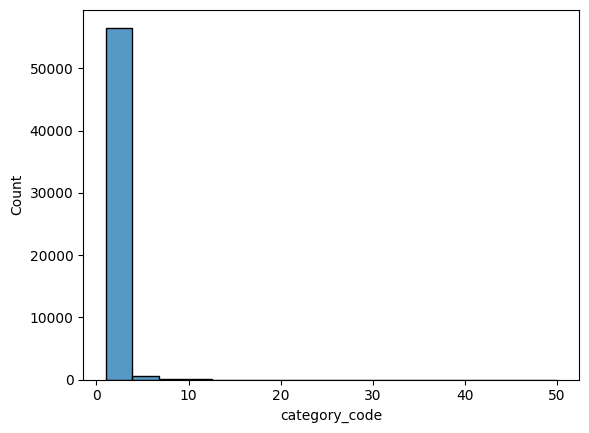

In [103]:
sns.histplot(df_filtered.groupby("user_id").count()["category_code"])

In [104]:
display(df_filtered)

,event_type,category_code,price,user_id,Main_category,Sub_category
0,purchase,electronics.smartphone,255.57,530510565,electronics,smartphone
1,purchase,electronics.smartphone,88.26,563648409,electronics,smartphone
2,purchase,electronics.smartphone,1029.09,560198101,electronics,smartphone
3,purchase,electronics.video.tv,694.17,572466923,electronics,video
4,purchase,electronics.smartphone,179.16,547251428,electronics,smartphone
...,...,...,...,...,...,...
68068,purchase,electronics.smartphone,136.71,572142479,electronics,smartphone
68069,purchase,electronics.audio.headphone,25.69,575990174,electronics,audio
68070,purchase,electronics.smartphone,104.93,550413435,electronics,smartphone
68071,purchase,appliances.kitchen.juicer,128.68,575871876,appliances,kitchen


In [105]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68073 entries, 0 to 68072
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_type     68073 non-null  object 
 1   category_code  68073 non-null  object 
 2   price          68073 non-null  float64
 3   user_id        68073 non-null  string 
 4   Main_category  68073 non-null  object 
 5   Sub_category   68073 non-null  object 
dtypes: float64(1), object(4), string(1)
memory usage: 3.1+ MB


##### Column Distribution

ValueError: num must be an integer with 1 <= num <= 4, not 5

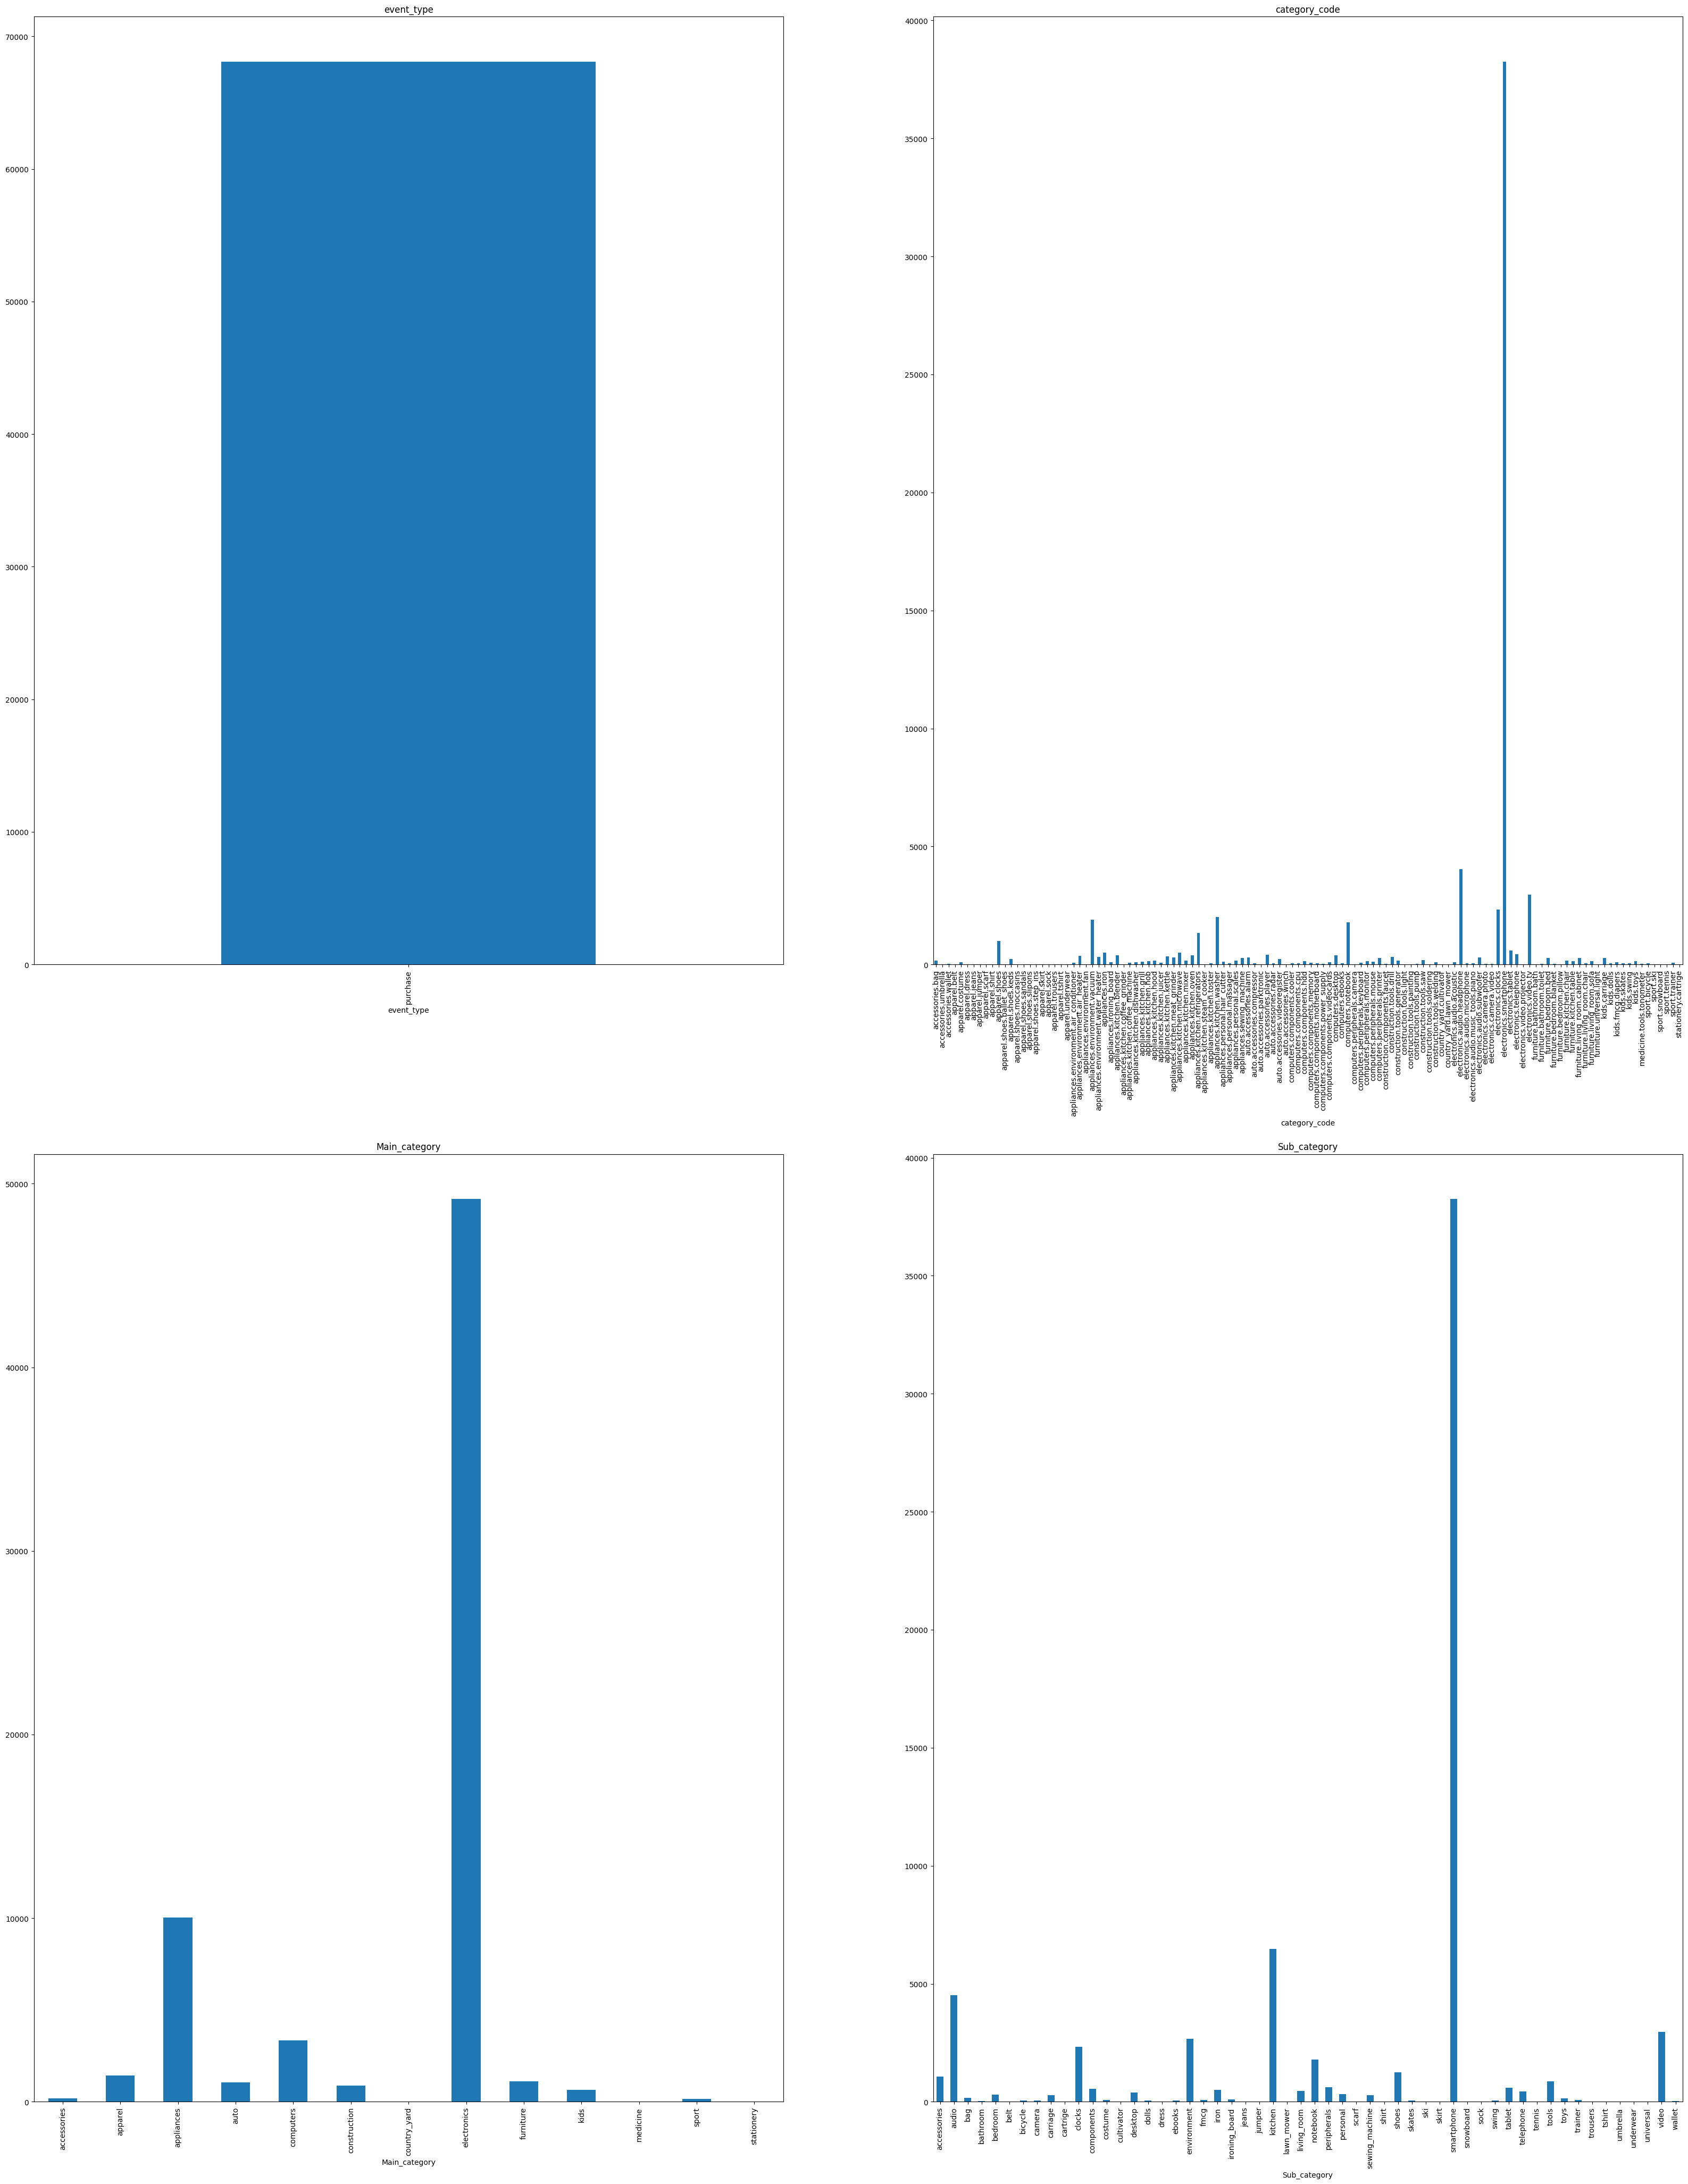

In [112]:
# cateogircla column
plt.figure(figsize=(40,40))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in list_categorical_columns:
    if column_name == "user_id":
        continue
    plt.subplot(2,2,x)
    x = x+1
    df_filtered[column_name].value_counts().sort_index().plot(kind='bar')
    plt.title(column_name)
plt.show()

In [122]:
# To do : each category percentage
print("Main Category", df_filtered['Main_category'].value_counts())
print("--"*50)
print("Sub Category", df_filtered['Sub_category'].value_counts().head(15))

Main Category Main_category
electronics     49156
appliances      10050
computers        3354
apparel          1421
furniture        1104
auto             1066
construction      887
kids              647
accessories       191
sport             150
medicine           27
stationery         15
country_yard        5
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Sub Category Sub_category
smartphone     38245
kitchen         6471
audio           4523
video           2966
environment     2667
clocks          2329
notebook        1790
shoes           1252
accessories     1066
tools            877
peripherals      621
tablet           600
components       540
iron             503
living_room      469
Name: count, dtype: int64


#### 2) Numeric Data Analysis

##### Unnecessary Column Check

In [124]:
df[list_numeric_columns].nunique().sort_values()

price    11584
dtype: int64

##### Column Distribution

In [125]:
df["price"].describe()

count    91547.000000
mean       300.111189
std        341.639659
min          0.870000
25%         82.840000
50%        169.920000
75%        362.100000
max       2574.070000
Name: price, dtype: float64

<Axes: >

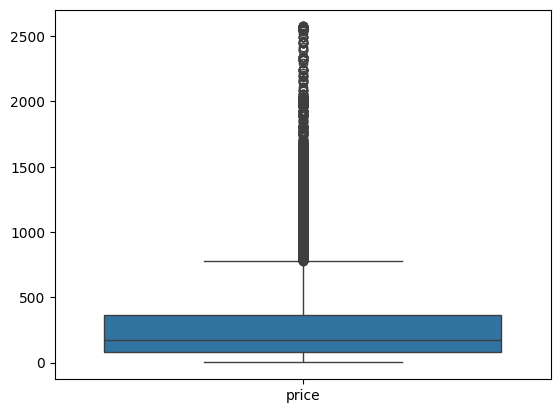

In [127]:
# 25%, 50%, 75% are under 500 and reset of them above around 750. Possibly SmartPhones.
sns.boxplot(df[list_numeric_columns])

In [130]:
# Check how much skewed
for column_name in list_numeric_columns:
  print(column_name, "skew : ", skew(df[column_name]), "kur : ", kurtosis(df[column_name]) )

price skew :  2.1110804586090732 kur :  4.943002067732956


### 2-4 EDA with pandas_profiling

In [131]:
df_filtered.profile_report().to_file(data_path + "[39]Data/data_eda_with_pandasprofiling.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. Data Processing 2

### 3-1 Missing Values

In [132]:
df_filtered.isna().sum().sort_values(ascending=False)

event_type       0
category_code    0
price            0
user_id          0
Main_category    0
Sub_category     0
dtype: int64

In [133]:
df_filtered

,event_type,category_code,price,user_id,Main_category,Sub_category
0,purchase,electronics.smartphone,255.57,530510565,electronics,smartphone
1,purchase,electronics.smartphone,88.26,563648409,electronics,smartphone
2,purchase,electronics.smartphone,1029.09,560198101,electronics,smartphone
3,purchase,electronics.video.tv,694.17,572466923,electronics,video
4,purchase,electronics.smartphone,179.16,547251428,electronics,smartphone
...,...,...,...,...,...,...
68068,purchase,electronics.smartphone,136.71,572142479,electronics,smartphone
68069,purchase,electronics.audio.headphone,25.69,575990174,electronics,audio
68070,purchase,electronics.smartphone,104.93,550413435,electronics,smartphone
68071,purchase,appliances.kitchen.juicer,128.68,575871876,appliances,kitchen


### 3-2 Feature Engineering

In [136]:
df_filtered_pivot = df_filtered.pivot_table(index=df_filtered.index, columns='Main_category', values=["price", "price"], aggfunc=["first","count"]).fillna(0)

In [137]:
df_filtered_pivot.columns = ['_'.join(col) for col in df_filtered_pivot.columns.values]

In [138]:
df_filtered_pivot["user_id"] = df_filtered["user_id"]

In [140]:
df_filtered_pivot.head(5)

,first_price_accessories,first_price_apparel,first_price_appliances,first_price_auto,first_price_computers,first_price_construction,first_price_country_yard,first_price_electronics,first_price_furniture,first_price_kids,...,count_price_computers,count_price_construction,count_price_country_yard,count_price_electronics,count_price_furniture,count_price_kids,count_price_medicine,count_price_sport,count_price_stationery,user_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.57,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,530510565
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.26,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,563648409
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1029.09,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,560198101
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,694.17,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,572466923
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179.16,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,547251428


In [141]:
df_user_pivot = df_filtered_pivot.groupby("user_id").agg(sum)

### 3-3 Feature Transformation

##### Normalization
*   Standardisation and  Normalisation is different.
*   Normalisation - [0,1] scaling (e.g. sklearn.MinMaxScaler())
*   Standardisation - Normal Distribution Standardise scaling (e.g. sklearn. StandardScaler())



In [142]:
df_user_pivot.head(1)

,first_price_accessories,first_price_apparel,first_price_appliances,first_price_auto,first_price_computers,first_price_construction,first_price_country_yard,first_price_electronics,first_price_furniture,first_price_kids,...,count_price_auto,count_price_computers,count_price_construction,count_price_country_yard,count_price_electronics,count_price_furniture,count_price_kids,count_price_medicine,count_price_sport,count_price_stationery
user_id,,,,,,,,,,,,,,,,,,,,,
225644257,0.0,0.0,0.0,0.0,40.91,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_user_pivot.loc[:, :] = scaler.fit_transform(df_user_pivot)
df_user_pivot.head(1)

,first_price_accessories,first_price_apparel,first_price_appliances,first_price_auto,first_price_computers,first_price_construction,first_price_country_yard,first_price_electronics,first_price_furniture,first_price_kids,...,count_price_auto,count_price_computers,count_price_construction,count_price_country_yard,count_price_electronics,count_price_furniture,count_price_kids,count_price_medicine,count_price_sport,count_price_stationery
user_id,,,,,,,,,,,,,,,,,,,,,
225644257,0.0,0.0,0.0,0.0,0.002869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


MinMaxScaler Review
*   Feature Transformation(Scaling) technique
*   ( X- (X.min()) ) / ( X.Max() - X.min() )
*   https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
*   https://en.wikipedia.org/wiki/Feature_scaling



In [147]:
# title_sentiment_polarity

x_min = df_user_pivot["first_price_computers"].min()
x_max = df_user_pivot["first_price_computers"].max()
print(x_min)
print(x_max)

first_price_computers    0.0
first_price_computers    0.0
dtype: float64
first_price_computers    1.0
first_price_computers    1.0
dtype: float64


In [148]:
(df_user_pivot["first_price_computers"] - x_min)/(x_max-x_min)

,first_price_computers,first_price_computers
user_id,,
225644257,0.002869,0.002869
315835876,0.000000,0.000000
435584787,0.000000,0.000000
448659331,0.000000,0.000000
465378521,0.000000,0.000000
...,...,...
579908999,0.000000,0.000000
579926563,0.000000,0.000000
579935169,0.000000,0.000000


### 3-4 Summary
##### Final Features
1.   pivoting by Main Category Data
2.   aggregation by user_id

##### df_user_pivot

## 4. Model Analysis


### Model Optimization with K-means Algorithm

- K-Means 알고리즘은 비지도학습 중에서 가장 대표적인 클러스터링(Clustering) 알고리즘입니다. 클러스터링은 데이터를 비슷한 특성을 가진 그룹으로 나누는 작업을 의미한다.
- K-Means 알고리즘은 매우 빠르고 간단한 구현으로도 좋은 성능을 보여주는 클러스터링 알고리즘 중 하나이지만, 초기 클러스터 중심값 선택이나 클러스터 개수 선택 등 초기 설정이 클러스터링 성능에 영향을 미친다.

- 알고리즘의 동작 순서는 다음과 같다.
1. 초기 클러스터 중심값 지정
2. 모든 데이터 포인트들을 가장 가까운 클러스터에 할당
3. 할당된 클러스터에 대해 클러스터 중심값을 재계산
4. 2-3 과정을 반복하며 클러스터 중심값과 할당을 업데이트
- 이 알고리즘에서 K개의 클러스터 중심값은 초기에 무작위로 선택된다. 그리고 각 데이터 포인트는 가장 가까운 클러스터 중심값에 할당된다. 이후 할당된 데이터 포인트를 이용해 해당 클러스터의 중심값을 계산한다. 클러스터 중심값이 업데이트되면 각 데이터 포인트는 다시 가장 가까운 클러스터 중심값에 할당된다. 이 과정을 클러스터 할당과 중심값 계산이 변화가 없을 때까지 반복한다.

In [149]:
sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_user_pivot)
    sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

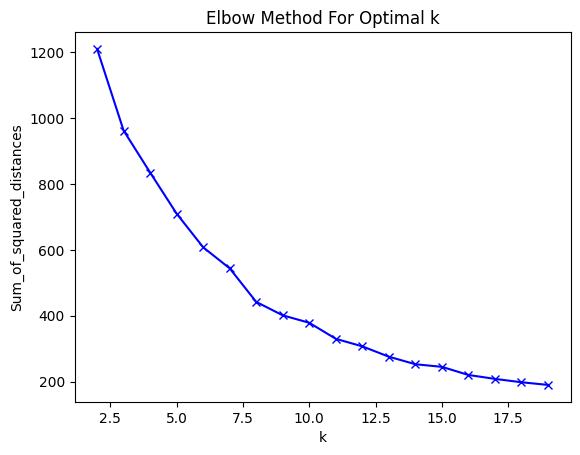

In [150]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow Method는 클러스터 개수(K)를 변화시켜가면서 K-Means 알고리즘을 수행한 결과를 나타낸 그래프에서, 그래프의 모양이 팔꿈치(Elbow) 모양을 띄는 지점에서 최적의 클러스터 개수를 결정하는 방법.

이 방법은 클러스터 개수를 점차 증가시켜가면서 K-Means 알고리즘을 실행하고, 각 클러스터마다의 제곱 오차합(SSE, Sum of Squared Errors)을 구한 뒤 이를 그래프로 나타냄. 그래프에서 클러스터 개수(K)가 증가함에 따라 SSE는 감소하게 되며, 이는 클러스터 개수(K)가 증가하면 각 클러스터에 할당된 데이터 포인트들과 해당 클러스터의 중심점과의 거리가 줄어들기 때문. 그리고 그래프에서 SSE의 증감폭이 크게 줄어드는 팔꿈치 모양을 띄는 지점에서 최적의 클러스터 개수를 결정,

k=8 is elbow

In [151]:
km_final = KMeans(n_clusters=8)
km_final = km_final.fit(df_user_pivot)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [152]:
km_final.predict(df_user_pivot)

array([5, 0, 2, ..., 1, 0, 5], dtype=int32)

In [153]:
df_user_pivot["cluster_number"] = km_final.predict(df_user_pivot)

In [154]:
cluster_result = df_user_pivot.groupby("cluster_number").agg(np.mean)

In [155]:
len(cluster_result.columns)

52

In [156]:
cluster_result.iloc[:,:26]

,first_price_accessories,first_price_apparel,first_price_appliances,first_price_auto,first_price_computers,first_price_construction,first_price_country_yard,first_price_electronics,first_price_furniture,first_price_kids,...,first_price_auto,first_price_computers,first_price_construction,first_price_country_yard,first_price_electronics,first_price_furniture,first_price_kids,first_price_medicine,first_price_sport,first_price_stationery
cluster_number,,,,,,,,,,,,,,,,,,,,,
0,0.000,4.328903e-07,1.073582e-07,0.000000,0.000000,0.000000,0.000054,0.019322,0.000000,0.000746,...,0.000000,0.000000,0.000000,0.000054,0.019322,0.000000,0.000746,0.000354,0.000367,0.000111
1,0.000,4.758093e-05,3.145846e-02,0.000000,0.000060,0.000002,0.000000,0.001448,0.000011,0.000092,...,0.000000,0.000060,0.000002,0.000000,0.001448,0.000011,0.000092,0.000000,0.000010,0.000000
2,0.000,3.645687e-04,5.791980e-04,0.000000,0.000328,0.073965,0.000000,0.001450,0.000481,0.000135,...,0.000000,0.000328,0.073965,0.000000,0.001450,0.000481,0.000135,0.000000,0.000000,0.000000
3,0.000,2.210703e-04,4.309557e-04,0.081564,0.000155,0.000061,0.000000,0.001683,0.000000,0.000039,...,0.081564,0.000155,0.000061,0.000000,0.001683,0.000000,0.000039,0.000000,0.000385,0.000000
4,0.000,4.452365e-04,8.916189e-04,0.000000,0.000357,0.000000,0.000000,0.002131,0.132210,0.000894,...,0.000000,0.000357,0.000000,0.000000,0.002131,0.132210,0.000894,0.000000,0.000153,0.000000
5,0.000,0.000000e+00,1.828825e-04,0.000000,0.032022,0.000000,0.000000,0.002496,0.000000,0.000010,...,0.000000,0.032022,0.000000,0.000000,0.002496,0.000000,0.000010,0.000000,0.000101,0.000000
6,0.000,1.192884e-01,3.525466e-04,0.000000,0.000198,0.000021,0.000000,0.002141,0.000059,0.000253,...,0.000000,0.000198,0.000021,0.000000,0.002141,0.000059,0.000253,0.000000,0.000000,0.000000
7,0.113,1.358509e-03,2.050868e-04,0.000392,0.001223,0.000000,0.000000,0.001538,0.000934,0.000000,...,0.000392,0.001223,0.000000,0.000000,0.001538,0.000934,0.000000,0.000000,0.000000,0.000000


In [157]:
cluster_result.iloc[:,26:]

,count_price_accessories,count_price_apparel,count_price_appliances,count_price_auto,count_price_computers,count_price_construction,count_price_country_yard,count_price_electronics,count_price_furniture,count_price_kids,...,count_price_auto,count_price_computers,count_price_construction,count_price_country_yard,count_price_electronics,count_price_furniture,count_price_kids,count_price_medicine,count_price_sport,count_price_stationery
cluster_number,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000005,0.000003,0.000000,0.000000,0.000000,0.000123,0.023246,0.000000,0.002468,...,0.000000,0.000000,0.000000,0.000123,0.023246,0.000000,0.002468,0.000331,0.001170,0.000368
1,0.000000,0.000096,0.119344,0.000000,0.000205,0.000027,0.000000,0.001850,0.000043,0.000289,...,0.000000,0.000205,0.000027,0.000000,0.001850,0.000043,0.000289,0.000000,0.000072,0.000000
2,0.000000,0.000269,0.003367,0.000000,0.001077,0.267273,0.000000,0.002279,0.001212,0.000404,...,0.000000,0.001077,0.267273,0.000000,0.002279,0.001212,0.000404,0.000000,0.000000,0.000000
3,0.000000,0.000216,0.001947,0.345667,0.000541,0.000730,0.000000,0.001967,0.000000,0.000162,...,0.345667,0.000541,0.000730,0.000000,0.001967,0.000000,0.000162,0.000000,0.000325,0.000000
4,0.000000,0.000543,0.004236,0.000000,0.001955,0.000000,0.000000,0.002209,0.213881,0.002444,...,0.000000,0.001955,0.000000,0.000000,0.002209,0.213881,0.002444,0.000000,0.000652,0.000000
5,0.000000,0.000000,0.001048,0.000000,0.123045,0.000000,0.000000,0.003064,0.000000,0.000056,...,0.000000,0.123045,0.000000,0.000000,0.003064,0.000000,0.000056,0.000000,0.000224,0.000000
6,0.000000,0.119023,0.001872,0.000000,0.000766,0.000191,0.000000,0.002894,0.000153,0.001149,...,0.000000,0.000766,0.000191,0.000000,0.002894,0.000153,0.001149,0.000000,0.000000,0.000000
7,0.513441,0.001792,0.001195,0.001792,0.004779,0.000000,0.000000,0.001828,0.002151,0.000000,...,0.001792,0.004779,0.000000,0.000000,0.001828,0.002151,0.000000,0.000000,0.000000,0.000000
